# Balancing Effect on Distribution

In [2]:
import joblib
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc, plot_precision_recall, plot_cumulative_gain, plot_lift_curve
from statistics import mean, mode
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import pandas as pd

#  Plots  
import matplotlib.pyplot as plt


In [3]:
# Loading data
# file_path = Path("../data/myopia.csv")
file_path = Path("../eda/reduced_filtered_df.csv")
df = pd.read_csv(file_path)
df.head(5)

<IPython.core.display.Javascript object>

,ACD,LT,VCD,SPORTHR,DADMY,delta_spheq,total_positive_screen,MYOPIC
0,3.702,3.392,15.29,4,1,1.358,8,0
1,3.462,3.514,15.52,14,0,1.929,10,0
2,3.224,3.556,15.36,10,1,2.494,26,0
3,3.186,3.654,15.49,12,1,1.433,16,0
4,3.732,3.584,15.08,12,0,2.022,8,0


In [4]:
# Check dataset balance
df["MYOPIC"].value_counts()

0    323
1     49
Name: MYOPIC, dtype: int64

In [5]:
# Define X,y
label = df["MYOPIC"]
X = df.iloc[:,:-1].copy()
X.head()

,ACD,LT,VCD,SPORTHR,DADMY,delta_spheq,total_positive_screen
0,3.702,3.392,15.29,4,1,1.358,8
1,3.462,3.514,15.52,14,0,1.929,10
2,3.224,3.556,15.36,10,1,2.494,26
3,3.186,3.654,15.49,12,1,1.433,16
4,3.732,3.584,15.08,12,0,2.022,8


In [6]:
# Note the use of strategy since the dataset is imbalanced. 
# I am isolaating the X_test and y_test from the preprossing 
X_train, X_test, y_train, y_test = train_test_split(X, label, random_state=42, test_size=0.1, stratify=label)

<IPython.core.display.Javascript object>

In [7]:
y_train.value_counts()

0    290
1     44
Name: MYOPIC, dtype: int64

In [8]:
y_test.value_counts()

0    33
1     5
Name: MYOPIC, dtype: int64

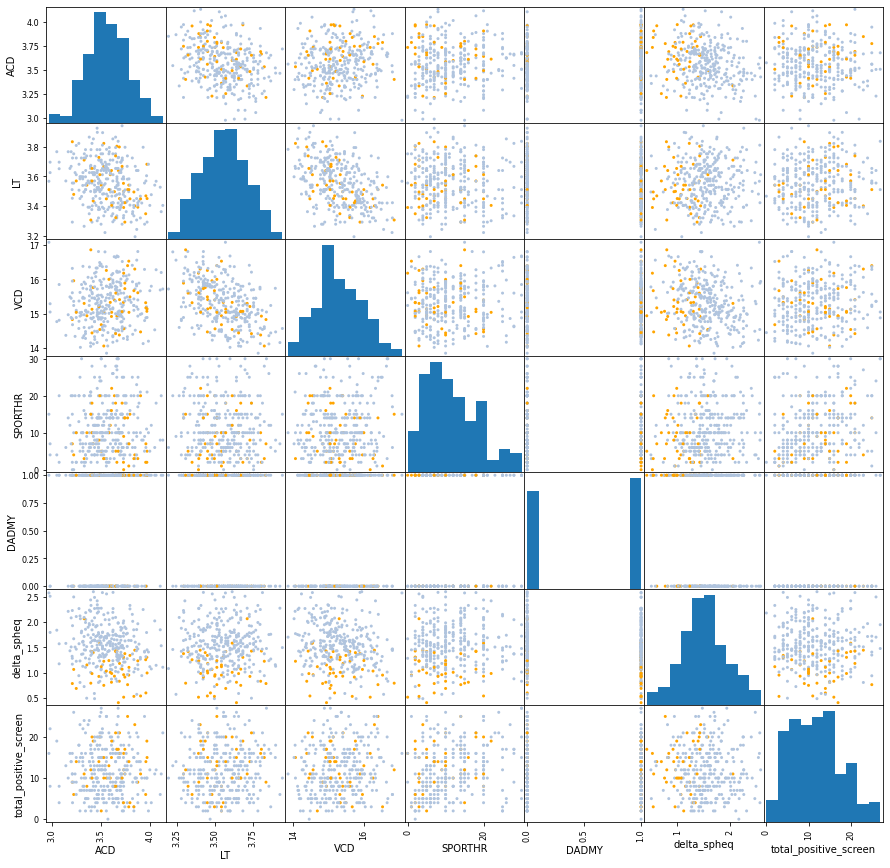

In [9]:
# original data
colors = {0:'lightsteelblue', 1:'orange'}
pd.plotting.scatter_matrix(X_train, alpha=1, figsize=(15,15), c=y_train.map(colors) );

## Balancing Data - RandomOverSampler

In [10]:
# Compared to the raw data scatter, the below scatter plot shows the datapoints just duplicated and plotted on top
# Note that the raw data scatter has no transparency while all the other charts below have alpha=0.2
# This was done so the effects of duplicated datapoints could be identified
# In theory, only the minority class is being duplicated but this could cause some overfitting.  
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [11]:
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 290, 1: 44})
Resample dataset shape Counter({0: 290, 1: 290})


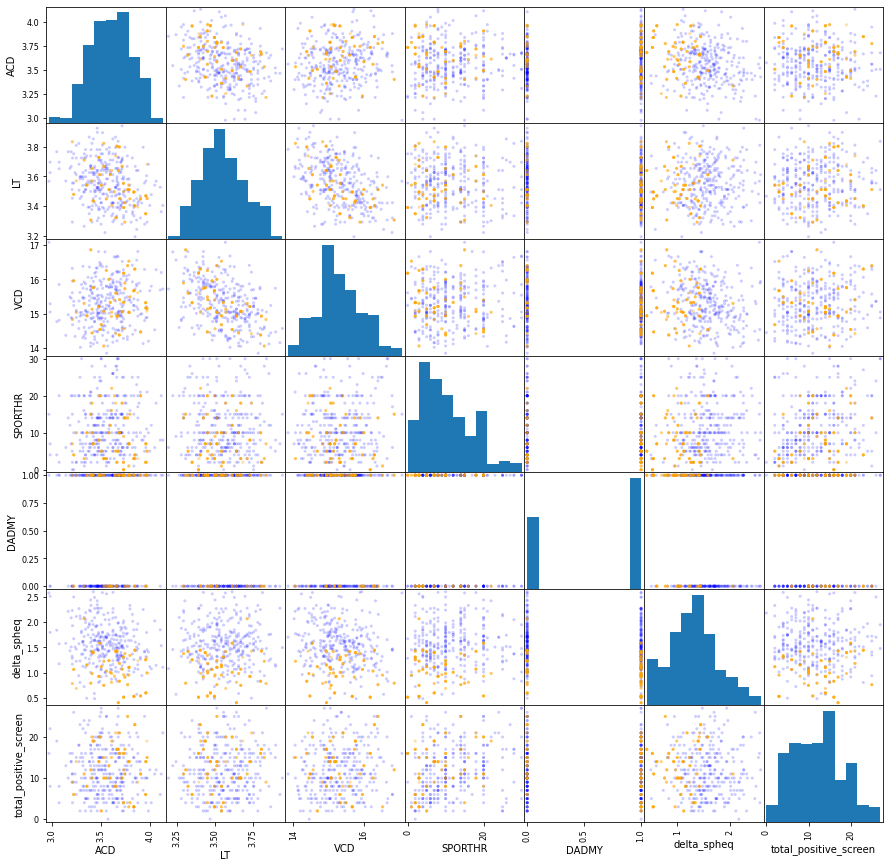

In [12]:
# balanced data
colors = {0:'blue', 1:'orange'}
pd.plotting.scatter_matrix(X_ros, alpha=0.2, figsize=(15,15), c=y_ros.map(colors) );

In [13]:
X_ros.describe()

,ACD,LT,VCD,SPORTHR,DADMY,delta_spheq,total_positive_screen
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,3.601953,3.547336,15.318690,10.058621,0.605172,1.315798,12.150000
std,0.208514,0.143095,0.630273,6.713481,0.489236,0.461371,5.836865
min,2.972000,3.196000,13.850000,0.000000,0.000000,0.411000,0.000000
25%,3.462000,3.450000,14.930000,5.000000,0.000000,0.996000,8.000000
50%,3.610000,3.534000,15.240000,9.000000,1.000000,1.309000,12.000000
75%,3.744000,3.654000,15.760000,14.000000,1.000000,1.584000,16.000000
max,4.130000,3.940000,17.080000,30.000000,1.000000,2.597000,27.000000


## Balancing Data - SMOTE
- synthetic minority over-sampling technique

In [14]:
# Compared to the raw data scatter, the data is spread but very close to the existing datapoints
# Theoretically, there should be more points between the existing points such that `almost narrow paths` are created between the original samples
oversample = SMOTE(random_state=42)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [15]:
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 290, 1: 44})
Resample dataset shape Counter({0: 290, 1: 290})


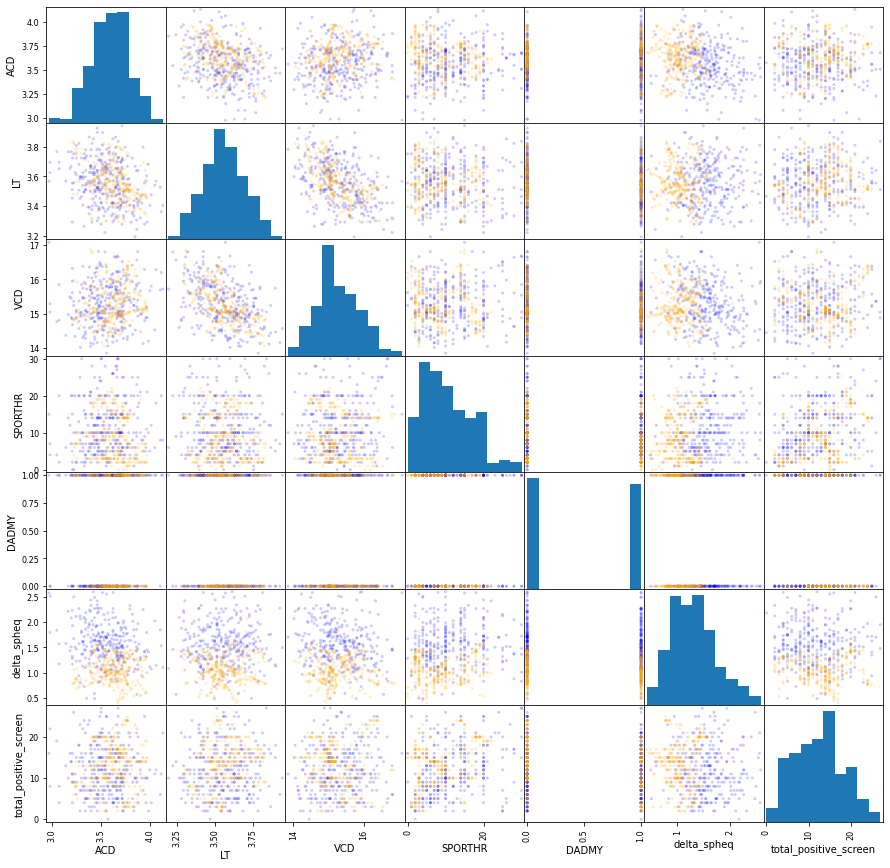

In [16]:
# balanced data
colors = {0:'blue', 1:'orange'}
pd.plotting.scatter_matrix(X_smote, alpha=0.2, figsize=(15,15), c=y_smote.map(colors) );

In [17]:
X_smote.describe()

,ACD,LT,VCD,SPORTHR,DADMY,delta_spheq,total_positive_screen
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,3.593847,3.558236,15.284574,10.213793,0.486207,1.320455,12.413793
std,0.194775,0.135838,0.596180,6.617542,0.500241,0.433518,5.694692
min,2.972000,3.196000,13.850000,0.000000,0.000000,0.411000,0.000000
25%,3.464000,3.467546,14.889477,5.000000,0.000000,1.004649,8.000000
50%,3.605618,3.552077,15.196369,9.000000,0.000000,1.282269,12.000000
75%,3.721041,3.654000,15.700000,15.000000,1.000000,1.571000,16.000000
max,4.130000,3.940000,17.080000,30.000000,1.000000,2.597000,27.000000


## Balacing Data - SMOTE with Undersampling

In [18]:
# Compared to the raw data scatter, the below scatter plot shows the datapoints scattered but there still exists an imbalance
# The dataset is smaller since the minority class was increasted and the majority class descreased in samples
# The distributions have some signficant differences
# In theory, the new samples will not follow a narrow path but a broad path giving it an appearance of randomness. 
# the new samples can also veer toward other paths if the paths become close to each other.  This can cause changes in the distributions.  
# This is probably a good method if the dataset is large and highly imbalanced initially.  

print('Original dataset shape', Counter(y_train))
print('Minority fraction of entire dataset:  ', Counter(y_train)[1]/(Counter(y_train)[0]+Counter(y_train)[1]))

Original dataset shape Counter({0: 290, 1: 44})
Minority fraction of entire dataset:   0.1317365269461078


In [19]:
# sampling_strategy 
# - total number of samples increases
# - minority class changes from 30 to 84 and majority remains at 210.
# - Math:  sampling_strategy_input=(30+x)/210=0.4 then minority_samples=30+x

# To make it easier, lets enter how much of the overall datast you want the minority class to be
minority_fraction_minority_insert = 0.2
over_sampling_strategy = minority_fraction_minority_insert/(1-minority_fraction_minority_insert)

# create oversampling of minority class plan
over = SMOTE(sampling_strategy=over_sampling_strategy)

# sampling_strategy 
# - total number of samples decreases
# - minority class remains at 84 but the majority class decreases from 210 to 168.
# - Math:  84/(210-x)=0.5 then majority_samples=210-x

# To make it easier,, lets enter how much of the overall dataset you want the minority class to be
minority_fraction_majority_remove = 0.30
under_sampling_strategy = (1/minority_fraction_majority_remove - 1)**-1


under = RandomUnderSampler(sampling_strategy=under_sampling_strategy)

In [20]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [21]:
# transform the dataset
X_under_smote, y_under_smote = pipeline.fit_resample(X_train, y_train)

In [22]:
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_under_smote))

Original dataset shape Counter({0: 290, 1: 44})
Resample dataset shape Counter({0: 168, 1: 72})


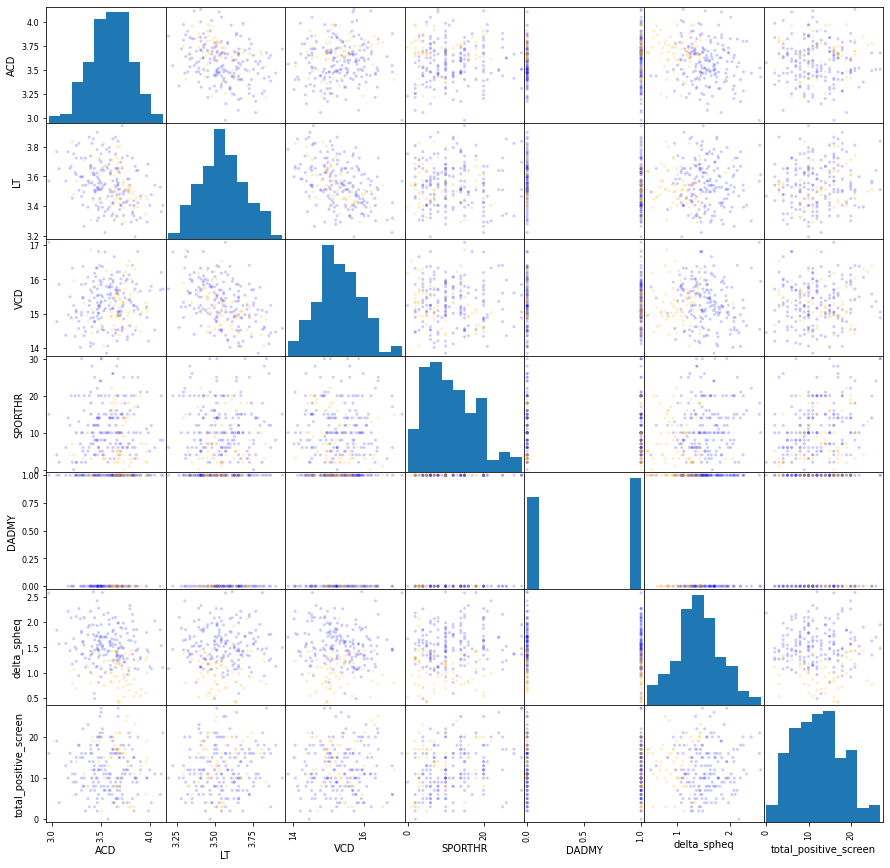

In [23]:
# balanced data
colors = {0:'blue', 1:'orange'}
pd.plotting.scatter_matrix(X_under_smote, alpha=0.2, figsize=(15,15), c=y_under_smote.map(colors) );

In [24]:
X_under_smote.describe()

,ACD,LT,VCD,SPORTHR,DADMY,delta_spheq,total_positive_screen
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,3.596030,3.548409,15.305751,11.125000,0.545833,1.416175,12.350000
std,0.208413,0.144657,0.624491,6.834031,0.498935,0.434486,5.712278
min,2.972000,3.196000,13.850000,0.000000,0.000000,0.411000,0.000000
25%,3.462000,3.450000,14.923791,6.000000,0.000000,1.120000,8.000000
50%,3.612110,3.542000,15.250000,10.000000,1.000000,1.417000,12.000000
75%,3.730000,3.654000,15.722500,15.000000,1.000000,1.699000,16.250000
max,4.130000,3.940000,17.080000,30.000000,1.000000,2.597000,27.000000


## Balancing Data - Sampling Low Density Areas
- Adaptive Synthetic Sampling

In [25]:
# Compared to the raw data scatter, the below scatter plot shows the datapoints spread but similar to the SMOTE method
# In theory, it adds samples to the low density areas and does not change the high density areas
oversample = ADASYN(random_state=42)
X_low_density, y_low_density = oversample.fit_resample(X_train, y_train)

In [26]:
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_low_density))

Original dataset shape Counter({0: 290, 1: 44})
Resample dataset shape Counter({1: 298, 0: 290})


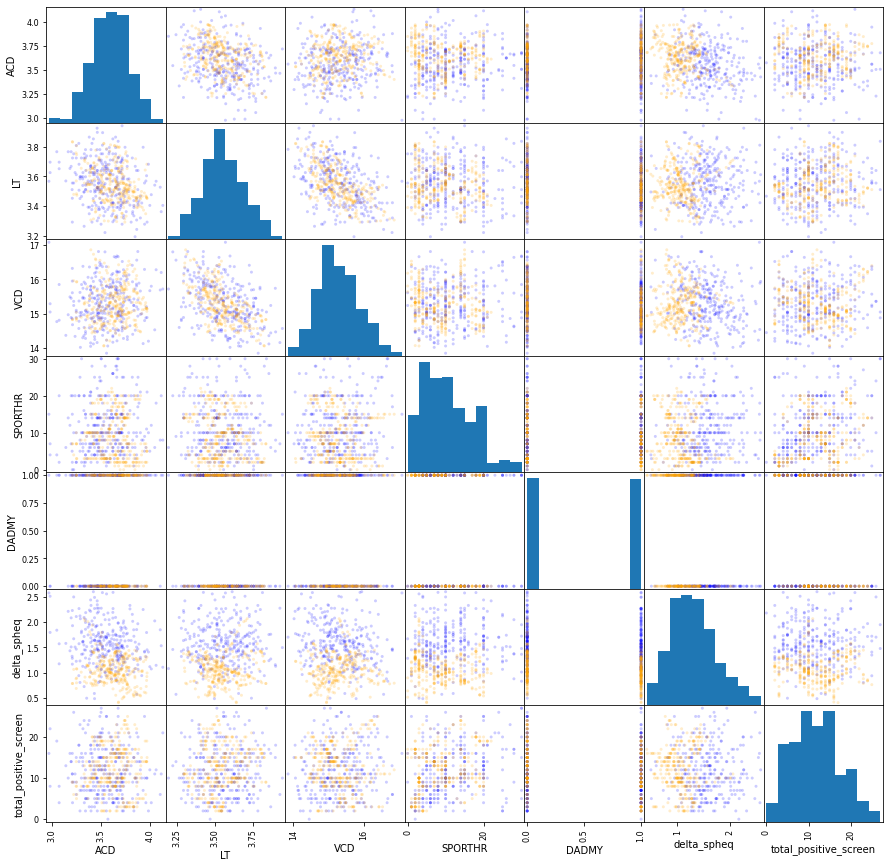

In [27]:
# balanced data
colors = {0:'blue', 1:'orange'}
pd.plotting.scatter_matrix(X_low_density, alpha=0.2, figsize=(15,15), c=y_low_density.map(colors) );

In [28]:
X_low_density.describe()

,ACD,LT,VCD,SPORTHR,DADMY,delta_spheq,total_positive_screen
count,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000
mean,3.594765,3.551582,15.293716,10.287415,0.498299,1.319562,11.896259
std,0.193604,0.134083,0.588202,6.646133,0.500423,0.437241,5.614333
min,2.972000,3.196000,13.850000,0.000000,0.000000,0.411000,0.000000
25%,3.464000,3.456779,14.881109,5.000000,0.000000,1.007565,8.000000
50%,3.604131,3.542000,15.240000,10.000000,0.000000,1.274717,11.000000
75%,3.727308,3.643176,15.700000,15.000000,1.000000,1.579750,16.000000
max,4.130000,3.940000,17.080000,30.000000,1.000000,2.597000,27.000000


## Balancing Data - Oversampling Misclassified

In [29]:
# Compared to the raw data scatter, the below scatter plot shows the datapoints spread but less drastically
# Often used to identify hard to classify datapoints.  The models that work well are KNN and SVM
# In theory, samples are added from the misclassified minority class as identified by KNN.  New samples are added along the 
# decision border but not within a boundary of majority class samples.  This prevents paths from forming to outliers.
# Note:  There is also a SVMSMOTE() which uses SVC to find the misclassified.

oversample = BorderlineSMOTE(random_state=42)
X_over_misc, y_over_misc = oversample.fit_resample(X_train, y_train)

In [30]:
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_over_misc))

Original dataset shape Counter({0: 290, 1: 44})
Resample dataset shape Counter({0: 290, 1: 290})


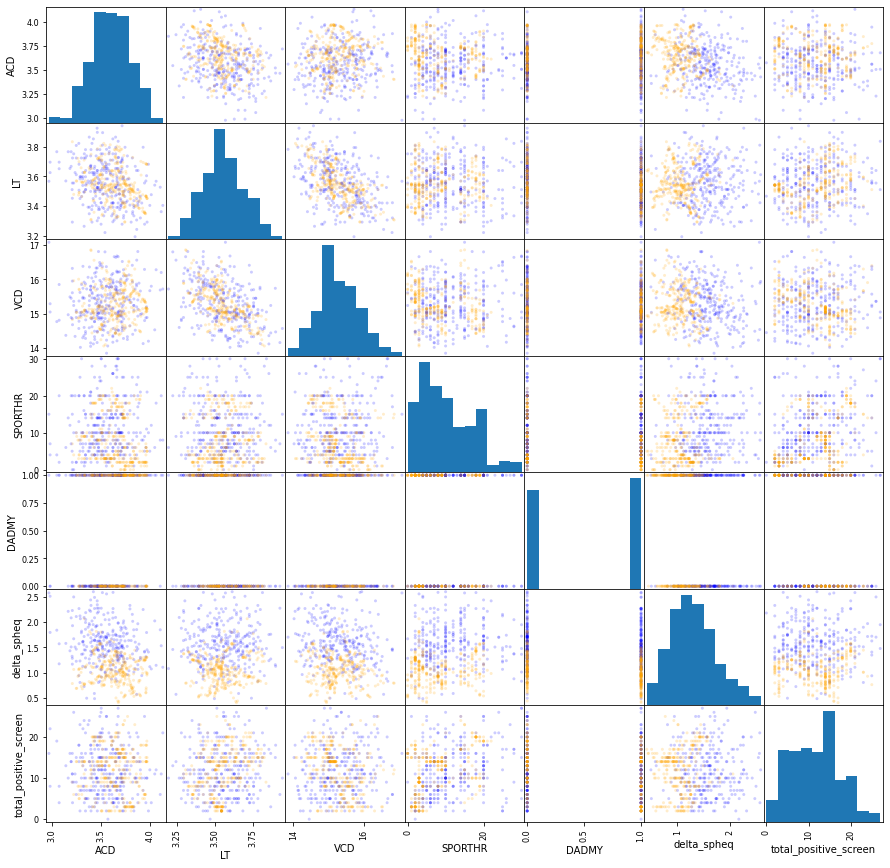

In [31]:
# balanced data
colors = {0:'blue', 1:'orange'}
pd.plotting.scatter_matrix(X_over_misc, alpha=0.2, figsize=(15,15), c=y_over_misc.map(colors) );

In [32]:
X_over_misc.describe()

,ACD,LT,VCD,SPORTHR,DADMY,delta_spheq,total_positive_screen
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,3.601133,3.554220,15.288106,9.798276,0.527586,1.317505,11.696552
std,0.200298,0.133594,0.578928,6.891134,0.499669,0.440741,5.710729
min,2.972000,3.196000,13.850000,0.000000,0.000000,0.411000,0.000000
25%,3.464000,3.466000,14.917500,4.000000,0.000000,0.992230,8.000000
50%,3.610131,3.542109,15.210000,8.000000,1.000000,1.272928,12.000000
75%,3.732000,3.641545,15.690000,15.000000,1.000000,1.584000,15.250000
max,4.130000,3.940000,17.080000,30.000000,1.000000,2.597000,27.000000


## SMOTE-NC - Used for mixed datatypes like Nominal and Continuous
- To Be Continued

## Other Methods
*  Imbalancelearn NearMiss() - uses KNN to undersample
*  Imbalancelearn CondensedNearestNeighbor() aka CNN - uses KNN to undersample but uses the misclassified majority class to penalize
*  Imbalancelearn TomekLinks() - Similar to CNN but uses redundant samples - doesn't appear to do a good job of balancing.


In [33]:
X_over_misc

,ACD,LT,VCD,SPORTHR,DADMY,delta_spheq,total_positive_screen
0,3.238000,3.626000,14.340000,20,1,1.507000,11
1,3.688000,3.798000,14.380000,10,1,0.833000,16
2,3.490000,3.498000,14.880000,14,1,1.621000,18
3,3.462000,3.780000,15.120000,14,1,1.467000,18
4,3.730000,3.425000,16.100000,14,1,1.277000,15
...,...,...,...,...,...,...,...
575,3.931427,3.693690,14.985664,2,0,1.297570,18
576,3.336764,3.496491,15.819603,3,0,1.120153,5
577,3.547248,3.422593,15.677379,3,0,1.150345,6
578,3.596725,3.396548,15.980014,3,0,1.197750,9


In [ ]:
## Comparing the distributions after sampling

In [43]:
df_list = [X_train, X_ros, X_under_smote, X_low_density, X_over_misc]
df_column_names = X_train.columns

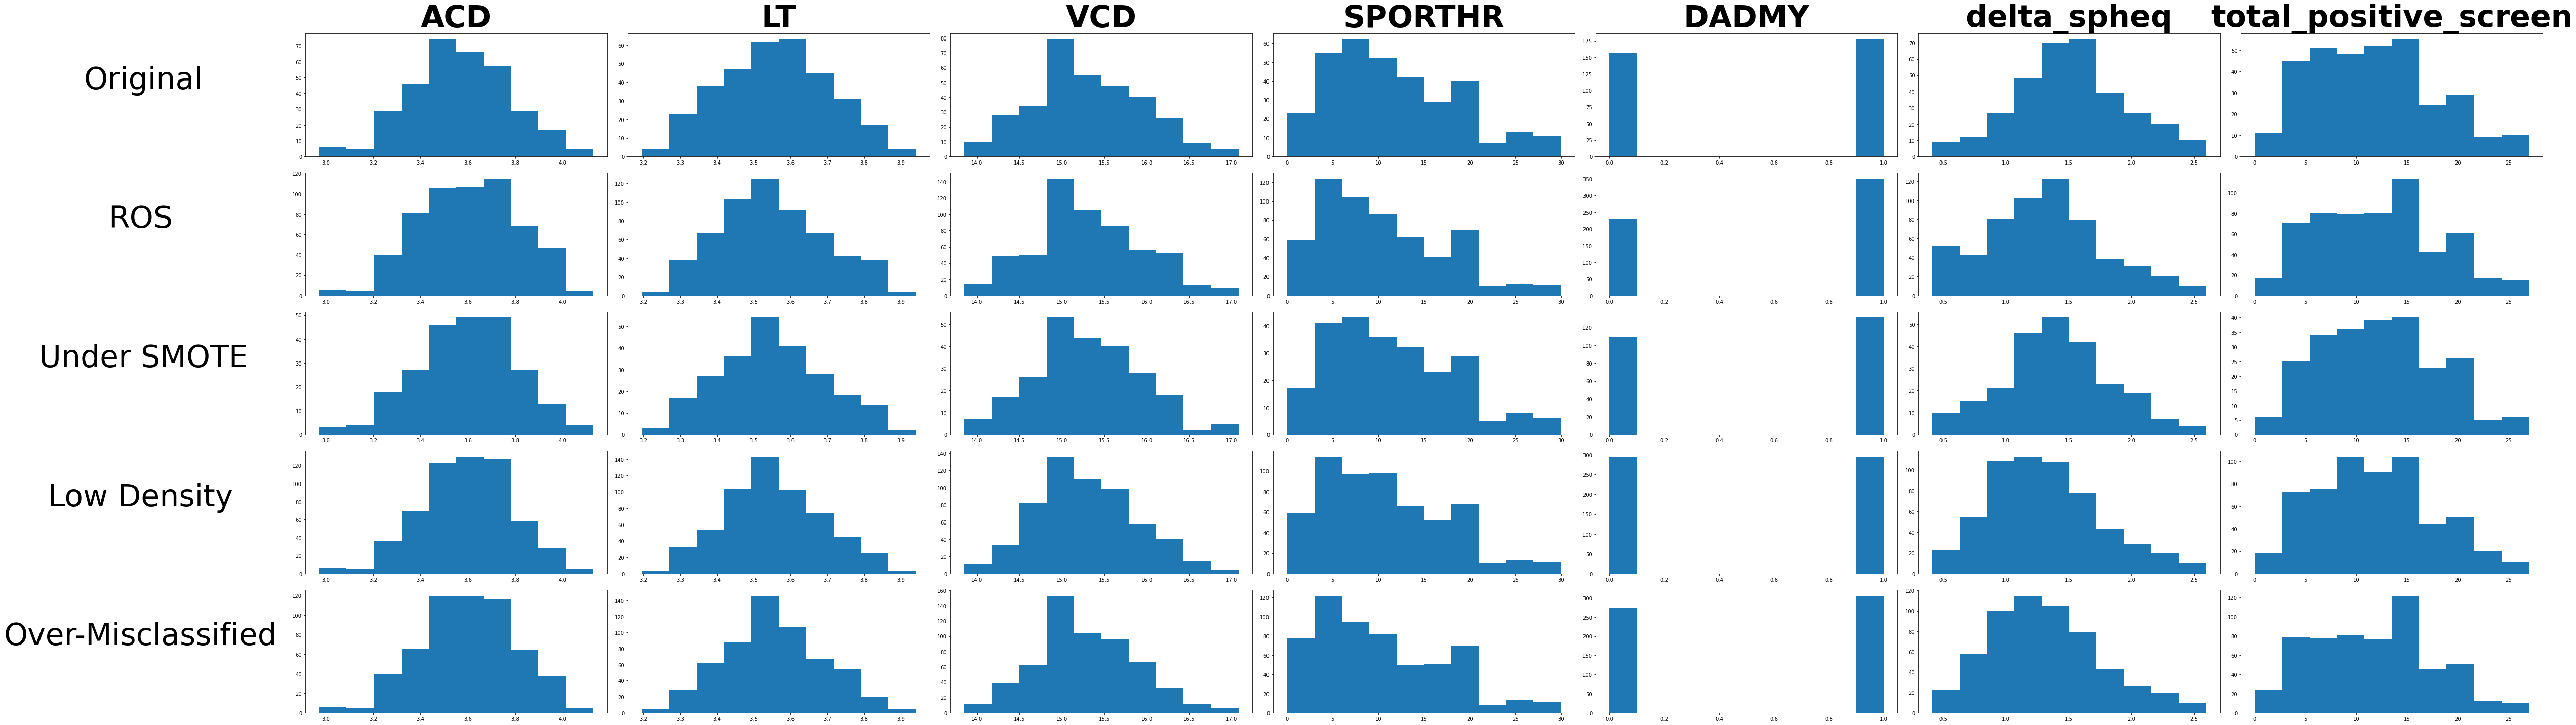

In [71]:
fig, axs = plt.subplots(5, 7, figsize=(70, 20))

for ax, col in zip(axs[0], df_column_names):
    ax.set_title(col, fontweight="bold", size=60)
    
for ax, row in zip(axs[:,0], ['Original', 'ROS', 'Under SMOTE', 'Low Density', 'Over-Misclassified']):
    ax.set_ylabel(row, rotation=0, size=60, labelpad=300)
    
fig.tight_layout()

for row in range(5):
    for col in range(7):
        axs[row,col].hist(df_list[row][df_column_names[col]]);